In [4]:
import camera as cam
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Vision System Implementation Report

This report outlines the key implementation choices made for the vision component of a robot project. The primary tasks of the vision system include detection of various colored objects – such as green goals, black obstacles, blue circles, and red shapes – and the extraction of spatial information necessary for navigation and interaction within the environment. These tasks are achieved through color-based image segmentation and geometric transformations.

## Image preprocessing 

### Color Space Conversion to HSV

A fundamental aspect of the vision system's implementation is the decision to employ the Hue, Saturation, and Value (HSV) color space over the standard Blue, Green, and Red (BGR) color space. The HSV color space separates image luminance (intensity of light), from color information, which resides in the hue and saturation components. This separation is beneficial because it reduces the system's sensitivity to variation in lighting conditions, thus affording more robust color detection. The use of HSV is particularly advantageous in differentiating between colors that have similar brightness levels but different tones, which is common in real-world environments.

At first we did some tests of the image we created for the map as follows : 

In [15]:
# Load the image
image = cv2.imread('maps/map_mobile_robotics_final3.jpeg')

OpenCV employs the BGR image format, meaning that when utilizing cv2.imread(), images are automatically interpreted in the BGR format. [20]

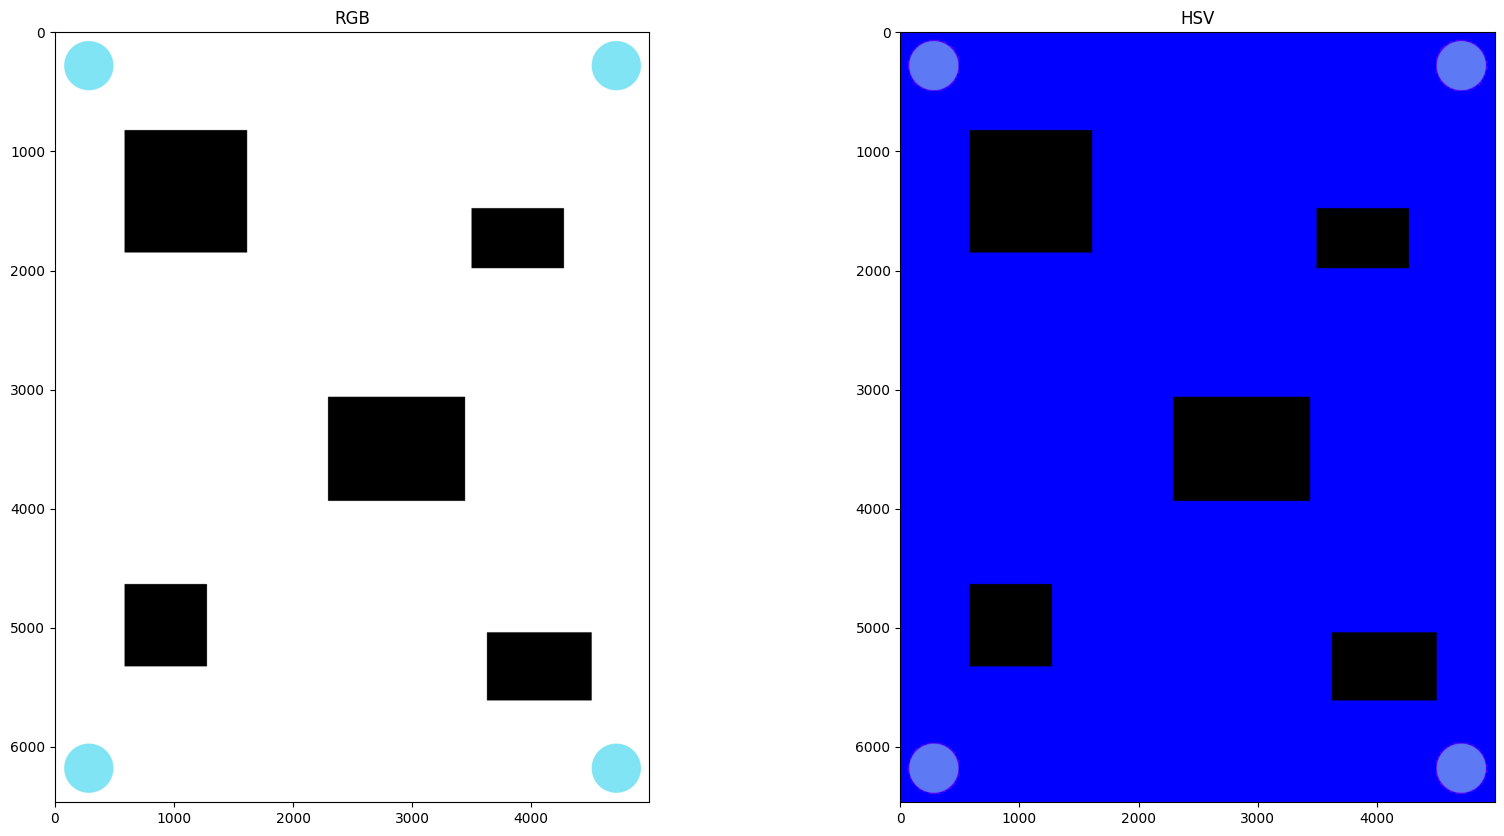

In [18]:
# Inverse red and blue
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Print the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('RGB')
ax1.imshow(image)
ax2.set_title('HSV')
ax2.imshow(hsv)

### Filtering Techniques

Bilateral filtering is employed on the HSV image before segmentation to reduce noise while preserving edge details. Unlike simple Gaussian filters, bilateral filtering considers both spatial proximity as well as color similarity, which avoids blurring across color edges. This technique was chosen to improve the accuracy of contour detection, as precise edge localization is critical for geometric analysis and object differentiation.

### Adaptive Thresholding for Color Segmentation

After converting the image to the HSV color space, an adaptive thresholding approach is implemented to define ranges for each color of interest. This method is chosen to accommodate the variability in color appearance caused by factors such as shadows, reflections, and inconsistent lighting. By dynamically setting the lower and upper bounds of color ranges with specified thresholds for HSV components, more consistent detection is reached across different conditions.

## 

### Geometric Figure Detection

In addition to color detection, the vision system implements contour-based geometric figure detection to distinguish among various shapes. This approach allows for identifying specific objects, such as black rectangles representing obstacles and triangular and rectangular red shapes marking the robot's own presence. By leveraging the geometric properties of contours, the system can calculate moments to find centroids and thereby recognize the position and orientation of objects and the robot itself.

### Perspective Transformation

The vision system implements a perspective transformation to normalize the view of the scene, effectively unwrapping the camera's view into a bird's-eye perspective. This choice is particularly relevant when dealing with planar objects positioned at different angles and distances from the camera. Perspective transformation simplifies the spatial relationship between objects, enabling more straightforward path planning and navigation tasks.

### Coordination with Navigation

The vision system's output includes coordinate transformations between the image plane and the real-world plane, which are crucial for the robot's interaction with its environment. By providing transformations between image space and a real-world coordinate system, the system ensures that detected objects can be located accurately within the robot's map, facilitating successful navigation and task execution.

### Modular and Versatile Functionality

Throughout the implementation, the vision system was designed to be modular and adaptable to different visualization and real-time processing modes. By including parameters and modes that can be adjusted, the system can be tailored for various use cases and can be easily integrated with other sub-systems within the robot's architecture.

## Conclusion

The vision system's implementation focused on robustness, accuracy, and versatility. Through the use of the HSV color space, adaptive thresholding, geometric figure detection, and perspective transformation, the system is equipped to handle the complexity of real-world navigation and interaction. Each implementation choice was made with the goal of supporting the robot's overall mission, ensuring that it can perform reliably in a dynamic environment.

[20] soumibardhan10, *Convert BGR and RGB with Python – OpenCV*, https://www.geeksforgeeks.org/convert-bgr-and-rgb-with-python-opencv/ \
[21] Sylvain Paris – MIT CSAIL, *A Gentle Introduction to Bilateral Filtering and its Applications*, https://people.csail.mit.edu/sparis/bf_course/slides/03_definition_bf. \
[22] \
[23] \
[24] \
[25] \
[26] 